# Geometry Rotations and Boundary Conditions

In [354]:
import numpy as np
import matplotlib.pyplot as plt

## Geometry Rotations
An ellipse with a major axis of 10 cm and a minor axis of 4 cm has its major axis aligned with the line y = 0.3x, and centered at the point (3, 4).  

1. Plot the ellipse before it is transformed.
2. Plot the ellipse after the transformation.

Ellipse formula:

$\frac{x^2}{25} + \frac{y^2}{4} = 1$

$y = \sqrt{4\left(1 - \frac{x^2}{25}\right)}$

In [355]:
num_pts = 1000
x_ellipse = np.linspace(-5,5,num_pts)
y_ellipse = np.sqrt(4 * ( 1 - x_ellipse**2/25))

# make a list of 2-D points for the top of the ellipse
pts_top = np.concatenate([x_ellipse, y_ellipse]).reshape( (2, num_pts))
# make a list of 2-D points for the bottom of the ellipse
pts_bot = np.concatenate([x_ellipse, -y_ellipse]).reshape( (2, num_pts))

# formulat for the line
slope = 0.3
y_axis =  x_ellipse * slope
line = np.concatenate([x_ellipse, y_axis]).reshape( (2, num_pts))

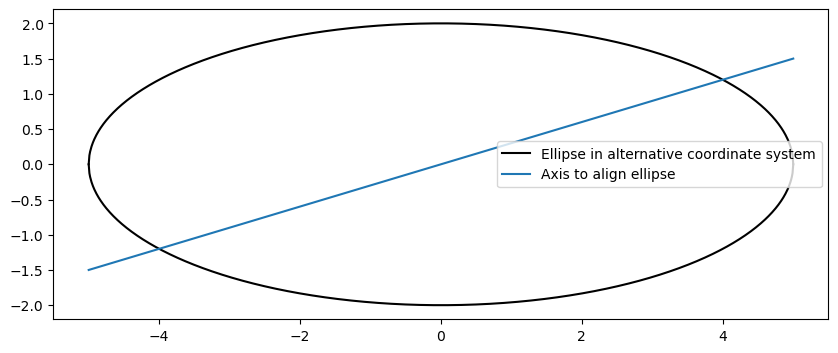

In [356]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_aspect(1)
plt.plot(pts_top[0,:], pts_top[1,:], color="black", label="Ellipse in alternative coordinate system")
plt.plot(pts_bot[0,:], pts_bot[1,:], color="black")
plt.plot(line[0,:], line[1,:], label="Axis to align ellipse")
plt.legend()
plt.show()

The line $y = 0.3x$ is rotated from the x-axis by $\gamma = \tan^1{0.3}$ [radians].

This results in a 2-D rotation matrix of 
$R_z(\gamma) = \begin{bmatrix}
\cos(\gamma) & -\sin(\gamma) \\
\sin(\gamma) & \cos(\gamma)
\end{bmatrix}$

This rotation will not move the center of the ellipse, so the translation to move it is 
$\begin{bmatrix} x_o \\
y_o \end{bmatrix} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$

In [357]:
gamma = np.arctan(slope)
Rz = np.array([ [np.cos(gamma), -np.sin(gamma)], [np.sin(gamma), np.cos(gamma)] ] )
T = np.array([[3], [4]])

Apply rotation to the vectors of points that define the ellipse:

$\begin{bmatrix} x \\ 
y \end{bmatrix} = R_z(\gamma) \begin{bmatrix}x' \\ y'\end{bmatrix} + \begin{bmatrix}x_o \\ y_o\end{bmatrix}$

In [358]:
transformed_pts_top = np.matmul(Rz, pts_top) + T
transformed_pts_bot = np.matmul(Rz, pts_bot) + T

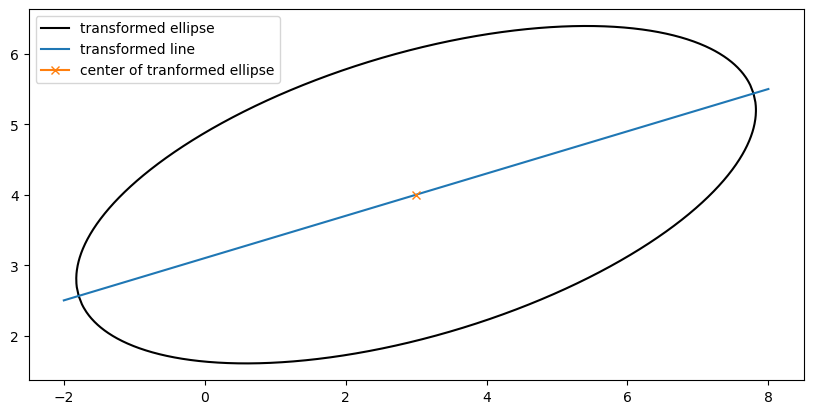

In [359]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_aspect(1)
plt.plot(transformed_pts_top[0,:], transformed_pts_top[1,:], color="black", label="transformed ellipse")
plt.plot(transformed_pts_bot[0,:], transformed_pts_bot[1,:], color="black")
plt.plot(line[0,:] + T[0], line[1,:] + T[1], label="transformed line")
plt.plot(T[0], T[1], marker="x", label="center of tranformed ellipse")
plt.legend()
plt.show()

## Boundary Conditions

Consider the above ellipse **before** the transformation.  

1. If a particle reflects off the inside of the ellipse at the location $(x,y) = (3, 1.6)$ with the direction that is 30$^o$ from the x-axis, what direction does it travel after the reflection?

2. Plot the ellipse showing the incoming and outgoing rays.

$F(x,y) = \frac{x^2}{25} + \frac{y^2}{4} - 1$

$\vec\nabla F(x,y) = \frac{2x}{25}\hat{e}_x + \frac{y}{2}\hat{e}_y$

$\hat{n} = \frac{\vec\nabla F(x,y)}{|\vec\nabla F(x,y)|}$


In [364]:
angle = 30 * np.pi/180
x = np.array([3, 1.6])
u = np.array([np.cos(angle), np.sin(angle)])

grad_F = np.array([2*x[0]/25, x[1]/2])
grad_F_norm = np.linalg.norm(grad_F)
n = grad_F/grad_F_norm

In [365]:
u_parallel = np.dot(u, n) * n
u_perp = u - u_parallel
u_reflect = -u_parallel + u_perp
print(f'The outgoing direction is {u_reflect}')

The outgoing direction is [ 0.44778268 -0.89414242]


In [366]:
incoming = x - u
outgoing = x + u_reflect

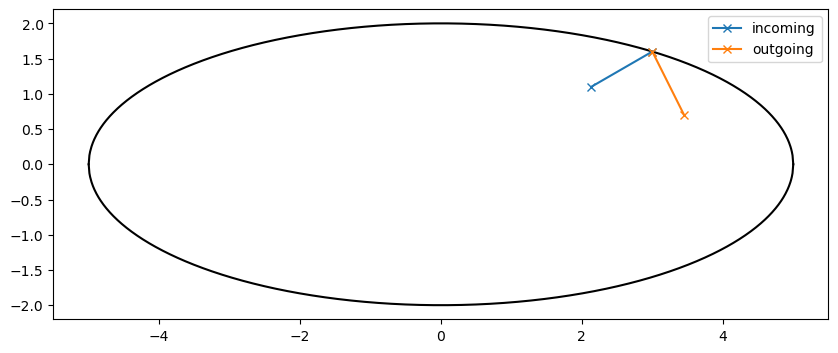

In [367]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_aspect(1)
plt.plot(pts_top[0,:], pts_top[1,:], color="black")
plt.plot(pts_bot[0,:], pts_bot[1,:], color="black")
plt.plot((incoming[0], x[0]), (incoming[1], x[1]),  marker="x", label="incoming")
plt.plot((outgoing[0], x[0]), (outgoing[1], x[1]),  marker="x", label="outgoing")
plt.legend()
plt.show()

## Activitiy 
1. Choose a different angle for the incoming particle at this point and repeat the above problem.

In [368]:
angle = -5 * np.pi/180
x = np.array([3, 1.6])
u = np.array([np.cos(angle), np.sin(angle)])

grad_F = np.array([2*x[0]/25, x[1]/2])
grad_F_norm = np.linalg.norm(grad_F)
n = grad_F/grad_F_norm

In [369]:
u_parallel = np.dot(u, n) * n
u_perp = u - u_parallel
u_reflect = -u_parallel + u_perp
print(f'The outgoing direction is {u_reflect}')

The outgoing direction is [ 0.87966112 -0.475601  ]


In [370]:
incoming = x - u
outgoing = x + u_reflect

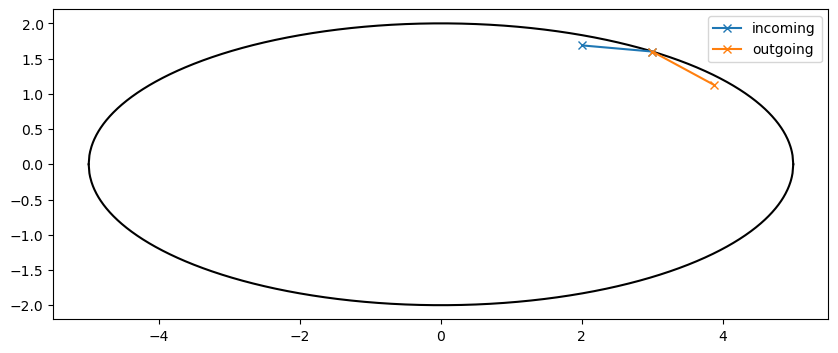

In [371]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_aspect(1)
plt.plot(pts_top[0,:], pts_top[1,:], color="black")
plt.plot(pts_bot[0,:], pts_bot[1,:], color="black")
plt.plot((incoming[0], x[0]), (incoming[1], x[1]),  marker="x", label="incoming")
plt.plot((outgoing[0], x[0]), (outgoing[1], x[1]),  marker="x", label="outgoing")
plt.legend()
plt.show()